In [1]:
STOCK_TICKER = 'TSLA'
ndays = 20 # HIGHER NUMBER OF DAYS, Forecasting: aggregating and compounding issue, use less 1-10days.
start_date = '2018-01-01'

In [2]:
from imports import *
import ta_functions as ta
import plotstock as ps

current_date = datetime.datetime.now().strftime('%Y-%m-%d')
stock_df = ta.get_stock_data(STOCK_TICKER, start_date, current_date)
#stock_df['RATES'] = ta.get_fed_rates(start_date, current_date) # This created sparse predictions
stock_df = ta.add_technical_indicators(stock_df) 
stock_df = ta.add_candlestickpatterns(stock_df)
#stock_df.columns

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# Model Training, X-is scaled
X, y, scaler = ta.prepare_ml_data(stock_df)
    
X_train, X_test, y_train, y_test = ta.train_test_split(X, y, test_size=0.20, random_state=500)

model = ta.train_model(X_train, y_train, nest=10000, md=6)

ta.evaluate_model(model, X_test, y_test)
current_price = round(stock_df['Close'].iloc[-1], 2)  # Most recent closing price
print(f'Current price of {STOCK_TICKER}:' , current_price)

# Make predictions
predicted_prices = ta.predict_prices(model, stock_df, scaler, num_days=ndays, window_size=300)
signal = ta.generate_signal(predicted_prices, current_price, stock_df)
print(STOCK_TICKER + " is predicted as a ---- ", signal)

# PLOT PREDICTION
ps.plot_with_predictions(stock_df, predicted_prices, ticker = STOCK_TICKER, num_days=ndays)

In [4]:
stock_df['PVT'] = ta.calculate_pvt(stock_df)

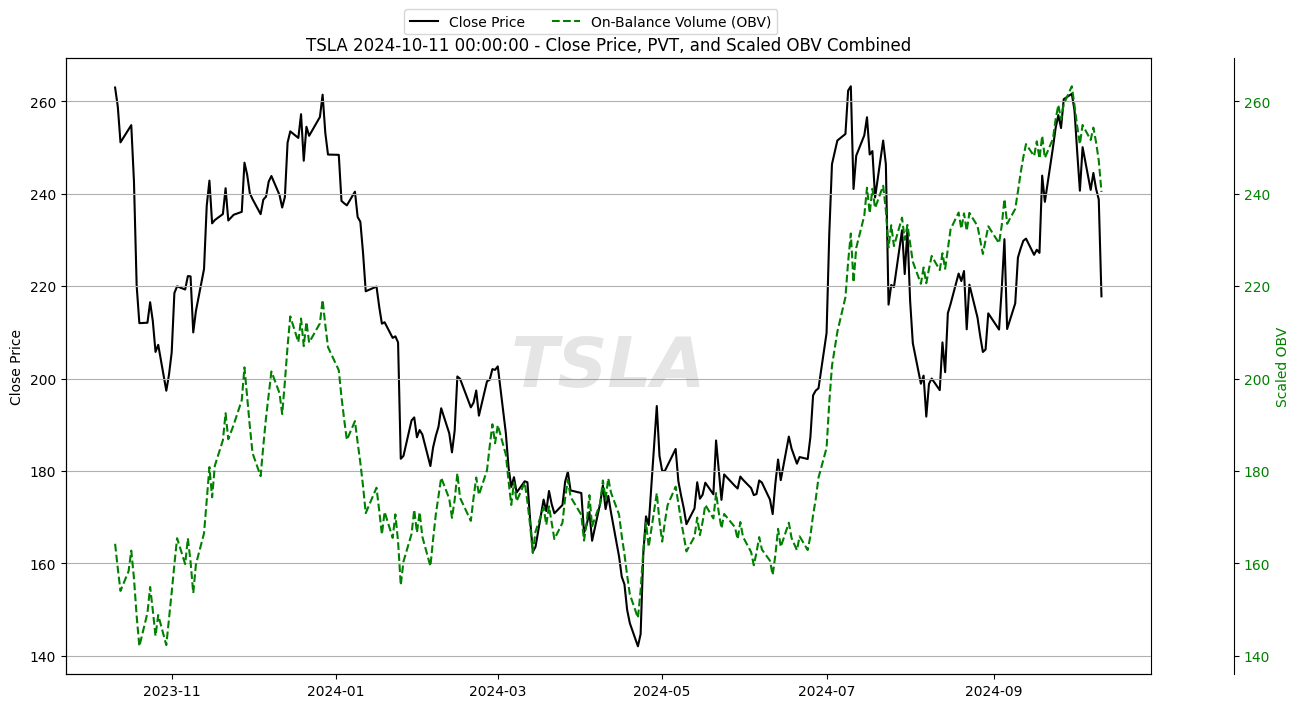

In [5]:
ps.plot_obv_pvt(stock_df, pvt=False, ticker=STOCK_TICKER)